# Pandas Tutorials

---


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

## Series

In [ ]:
#Series

data = np.random.rand(5)
index = ["a", "b", "c", "d", "e"]

s = pd.Series(data, index=index)
s

,0
a,0.760789
b,0.606140
c,0.173512
d,0.013173
e,0.950054


In [ ]:
s.array

<NumpyExtensionArray>
[ np.float64(0.7607890703476802),  np.float64(0.6061404803181224),
 np.float64(0.17351195968041533), np.float64(0.01317311138435806),
  np.float64(0.9500537927363093)]
Length: 5, dtype: float64

In [ ]:
# ndarray
s.to_numpy()

array([0.76078907, 0.60614048, 0.17351196, 0.01317311, 0.95005379])

In [ ]:
# Name attribute

s = pd.Series(np.random.rand(5), name="something")
s

,something
0,0.556711
1,0.927075
2,0.009948
3,0.828412
4,0.937346


In [ ]:
s.name

'something'

## DataFrame

In [ ]:
# From dict of series or dicts

In [ ]:
d = {
    "one" : pd.Series([1.0, 2.0, 3.0], index=["a", "b", "c"]),
    "two" : pd.Series([1.0, 2.0, 3.0, 4.0], index=["a", "b", "c", "d"])
}

In [ ]:
df = pd.DataFrame(d)
df

,one,two
a,1.0,1.0
b,2.0,2.0
c,3.0,3.0
d,NaN,4.0


In [ ]:
# From dict or dict of array to dataframe

df = pd.DataFrame.from_dict(
    dict([("A", [1, 2, 3]), ("B", [4, 5, 6])]),
    orient = "index",
    columns =["one", "two", "three"],
)

df

,one,two,three
A,1,2,3
B,4,5,6


In [ ]:
# Assign

data = {"SepalWidth": [5.1, 4.9, 4.7, 4.6 , 5.0], "SepalLength": [3.5, 3.0, 3.2, 3.1, 3.6],
        "PetalWidth": np.multiply([5.1, 4.9, 4.7, 4.6 , 5.0],2), "PetalLength": np.multiply([3.5, 3.0, 3.2, 3.1, 3.6], 2)}
iris = pd.DataFrame(data)

iris

,SepalWidth,SepalLength,PetalWidth,PetalLength
0,5.1,3.5,10.2,7.0
1,4.9,3.0,9.8,6.0
2,4.7,3.2,9.4,6.4
3,4.6,3.1,9.2,6.2
4,5.0,3.6,10.0,7.2


In [ ]:
iris.assign(Sepal_ration=iris["SepalWidth"] / iris["SepalLength"])

,SepalWidth,SepalLength,PetalWidth,PetalLength,Sepal_ration
0,5.1,3.5,10.2,7.0,1.457143
1,4.9,3.0,9.8,6.0,1.633333
2,4.7,3.2,9.4,6.4,1.468750
3,4.6,3.1,9.2,6.2,1.483871
4,5.0,3.6,10.0,7.2,1.388889


<Axes: xlabel='Sepal_ration', ylabel='Petal_ration'>

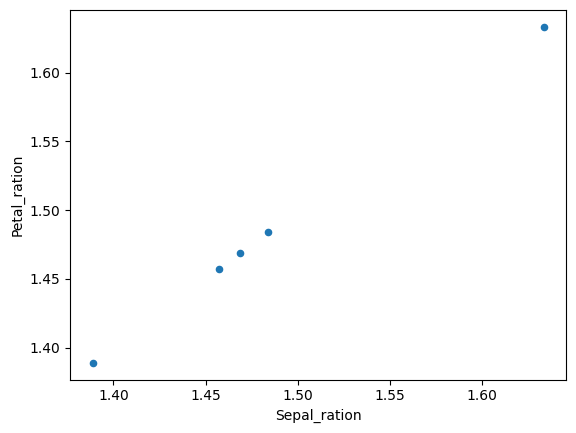

In [ ]:
(
    iris.query("SepalLength > 2.5").assign(
        Sepal_ration=lambda x: x.SepalWidth / x.SepalLength,
        Petal_ration=lambda x: x.PetalWidth / x.PetalLength
        ).plot(kind="scatter", x="Sepal_ration", y="Petal_ration")
)

### Indexing / selection

| Operation                        | Syntax           | Result     |
|----------------------------------|------------------|------------|
| Select column                    | `df[col]`        | Series     |
| Select row by label             | `df.loc[label]`  | Series     |
| Select row by integer location | `df.iloc[loc]`   | Series     |
| Slice rows                       | `df[5:10]`       | DataFrame  |
| Select rows by boolean vector   | `df[bool_vec]`   | DataFrame  |


In [ ]:
df_index = pd.DataFrame({
    "A" : np.random.random_sample(7),
    "B" : np.random.random_sample(7),
    "C" : np.random.random_sample(7),
    "D" : np.random.random_sample(7),
    "E" : np.random.random_sample(7),
    })

In [ ]:
df_index

,A,B,C,D,E
0,0.475917,0.044743,0.963895,0.291432,0.092570
1,0.139902,0.691637,0.351508,0.550370,0.093219
2,0.726893,0.944541,0.462752,0.099492,0.172048
3,0.233771,0.020301,0.010141,0.674844,0.602934
4,0.584034,0.038134,0.912629,0.068126,0.049339
5,0.679789,0.558504,0.009955,0.306814,0.398128
6,0.366050,0.953824,0.780689,0.894320,0.812004


In [ ]:
# Data alignment and arithmatic

df_alignment_1 = pd.DataFrame(np.random.rand(10, 4), columns=["A", "B", "C", "D"])
df_alignment_2 = pd.DataFrame(np.random.rand(7 ,3), columns=["A", "B", "C"])
df_alignment_1 + df_alignment_2

,A,B,C,D
0,0.985640,0.901987,0.985094,NaN
1,0.906433,1.662468,0.619391,NaN
2,0.429740,0.567409,0.575830,NaN
3,0.627070,0.977934,0.658680,NaN
4,0.978415,0.852425,0.672152,NaN
5,1.403311,1.323619,0.697856,NaN
6,0.559925,1.195160,0.707830,NaN
7,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN


## Essential basic functionality

### Attributes and underlying data

In [ ]:
df_attribute = pd.DataFrame(
    np.random.randint(10, size=(7,5)),
    index = ["a", "b", "c", "d", "e", "f", "g"],
    columns = ["a", "b", "c", "d", "e"],
)
df_attribute.columns

Index(['a', 'b', 'c', 'd', 'e'], dtype='object')

In [ ]:
df_attribute.columns = [x.upper() for x in df_attribute.columns]
df_attribute.columns

Index(['A', 'B', 'C', 'D', 'E'], dtype='object')

In [ ]:
# numpy array

np.asarray(df_attribute)

array([[1, 9, 3, 8, 8],
       [7, 8, 2, 8, 6],
       [4, 6, 7, 8, 0],
       [5, 6, 7, 2, 9],
       [8, 8, 8, 2, 7],
       [5, 6, 3, 6, 9],
       [6, 8, 2, 8, 2]])

### Matching / broadcasting behavior

In [ ]:
df_matching = pd.DataFrame({"one": pd.Series(np.random.randint(2, 5, 3), index=["a", "b", "c"]),
                   "two": pd.Series(np.random.randint(2, 5, 4), index=["a", "b", "c", "d"]),
                   "three":pd.Series(np.random.randint(2, 5, 3), index=["b", "c", "d"]),})

In [ ]:
df_matching

,one,two,three
a,3.0,3,NaN
b,3.0,4,3.0
c,3.0,4,4.0
d,NaN,2,2.0


In [ ]:
row_matching = df_matching.iloc[1]
row_matching

,b
one,3.0
two,4.0
three,3.0


In [ ]:
column_matching = df_matching['two']
column_matching

,two
a,3
b,4
c,4
d,2


In [ ]:
df_sub = df_matching.sub(row_matching, axis=1)
df_sub

,one,two,three
a,0.0,-1.0,NaN
b,0.0,0.0,0.0
c,0.0,0.0,1.0
d,NaN,-2.0,-1.0


### Missing data / operations with fill values

In [ ]:
df_sub_miss = df_matching.copy()
df_sub_miss

,one,two,three
a,3.0,3,NaN
b,3.0,4,3.0
c,3.0,4,4.0
d,NaN,2,2.0


In [ ]:
df_sub_miss.loc["d", "one"] = 1.0
df_sub_miss

,one,two,three
a,3.0,3,NaN
b,3.0,4,3.0
c,3.0,4,4.0
d,1.0,2,2.0


### Flexible comparisons

In [ ]:
df = pd.DataFrame({
    'A': [1, 4],
    'B': [3, 2]
})

df2 = pd.DataFrame({
    'A': [2, 3],
    'B': [1, 2]
})

In [ ]:
# df is greater than df2

df.gt(df2)

,A,B
0,False,True
1,True,False


### Boolean reductions

In [ ]:
df_boolean = pd.DataFrame({
    'A': [1, 4],
    'B': [3, np.nan],
    'C': [np.nan, np.nan]
})

In [ ]:
df_boolean

,A,B,C
0,1,3.0,NaN
1,4,NaN,NaN


In [ ]:
(df_boolean > 0).all()

,0
A,True
B,False
C,False


In [ ]:
df_boolean.dropna().empty

True

### Comparing array-like objects

In [ ]:
result = (pd.Series(["A", "B", "C"]) == "C").any()
print(result)

True


### Combining overlapping data sets

In [ ]:
df_combine1 = pd.DataFrame({
    "A": [1, np.nan, 3, 4, np.nan, 5],
    "B": [np.nan, np.nan, 7, 9, 5, 2]
})

df_combine1

,A,B
0,1.0,NaN
1,NaN,NaN
2,3.0,7.0
3,4.0,9.0
4,NaN,5.0
5,5.0,2.0


In [ ]:
df_combine2 = pd.DataFrame({
    "A": [10, 2, 3, 4, np.nan, 5],
    "B": [7, 5, 6, 9, np.nan, 2]
})
df_combine2

,A,B
0,10.0,7.0
1,2.0,5.0
2,3.0,6.0
3,4.0,9.0
4,NaN,NaN
5,5.0,2.0


In [ ]:
df_combine2.combine_first(df_combine1)

,A,B
0,10.0,7.0
1,2.0,5.0
2,3.0,6.0
3,4.0,9.0
4,NaN,5.0
5,5.0,2.0


In [ ]:
# Combine
# Applies a custom function element-wise to combine two DataFrames or Series.

df1 = pd.DataFrame({'A': [5, 0], 'B': [2, 4]})
df2 = pd.DataFrame({'A': [1, 1], 'B': [3, 3]})

In [ ]:
df3 = df1.combine(df2, np.maximum)
df3

,A,B
0,5,3
1,1,4


In [ ]:
# Cumulative sum

df_sum = [3, 5, 8, 10]
df_cumsum = np.cumsum(df_sum)
df_cumsum

array([ 3,  8, 16, 26])

### Descriptive statistics

In [ ]:
# cut
# It makes equally spaced ranges

data_cut = [1, 2, 2, 3, 10, 100]
print(pd.cut(data_cut, bins=3), "\n")
pd.cut(data_cut, bins=3, labels=["low", "mediumn", "high"])

[(0.901, 34.0], (0.901, 34.0], (0.901, 34.0], (0.901, 34.0], (0.901, 34.0], (67.0, 100.0]]
Categories (3, interval[float64, right]): [(0.901, 34.0] < (34.0, 67.0] < (67.0, 100.0]] 



['low', 'low', 'low', 'low', 'low', 'high']
Categories (3, object): ['low' < 'mediumn' < 'high']

In [ ]:
# qcut
# It makes quantiles: each bin has roughly the same number of data points.

data_qcut = [1, 2, 2, 3, 10, 100]
print(pd.qcut(data_cut, q=3), "\n")
pd.qcut(data_cut, q=3, labels=["low", "mediumn", "high"])

[(0.999, 2.0], (0.999, 2.0], (0.999, 2.0], (2.0, 5.333], (5.333, 100.0], (5.333, 100.0]]
Categories (3, interval[float64, right]): [(0.999, 2.0] < (2.0, 5.333] < (5.333, 100.0]] 



['low', 'low', 'low', 'mediumn', 'high', 'high']
Categories (3, object): ['low' < 'mediumn' < 'high']

### Function application

In [ ]:
# Pipe

data = [[8000, 1000], [9500, np.nan], [5000, 2000]]
df_salary = pd.DataFrame(data, columns=['Salary', 'Others'])

In [ ]:
df_salary

,Salary,Others
0,8000,1000.0
1,9500,NaN
2,5000,2000.0


In [ ]:
def subtract_federal_tax(df):
  return df * 0.9

def subtract_state_tax(df, rate):
    return df * (1 - rate)

def subtract_national_insurance(df, rate, rate_increase):
    new_rate = rate + rate_increase
    return df * (1 - new_rate)

In [ ]:
df_processed = df_salary.pipe(subtract_federal_tax).pipe(subtract_state_tax, rate=0.12)
df_processed

,Salary,Others
0,6336.0,792.0
1,7524.0,NaN
2,3960.0,1584.0


In [ ]:
# apply
# applies a function to each element.

df_processed.apply(lambda x: np.mean(x))


,0
Salary,5940.0
Others,1188.0


In [ ]:
# Aggregating with multiple functions
# apply one or more aggregation functions to a DataFrame

In [ ]:
data_agg = {
    'Sales': [200, 300, 250, 400],
    'Profit': [20, 30, 25, 50]
}
df_agg = pd.DataFrame(data_agg)
df_agg

,Sales,Profit
0,200,20
1,300,30
2,250,25
3,400,50


In [ ]:
result = df_agg.agg({
    'Sales': ['sum', 'mean'],
    'Profit': ['min', 'max', 'mean']
})
result

,Sales,Profit
sum,1150.0,NaN
mean,287.5,31.25
min,NaN,20.00
max,NaN,50.00


In [ ]:
# Transform
# It provide multiple operations at the same time rather than one-by-one.

df_agg

,Sales,Profit
0,200,20
1,300,30
2,250,25
3,400,50


In [ ]:
df_agg.transform(lambda x: x + 1)

,Sales,Profit
0,201,21
1,301,31
2,251,26
3,401,51


In [ ]:
# map
# It is used to transform each value in a single column.

df

,A,B
0,1,3
1,4,2


In [ ]:
df_map = df['A'].map(lambda x: x+2)
df_map

,A
0,3
1,6


In [ ]:
# Index
# It change the row or column labels of a DataFrame to a new set, adding missing labels with NaN values.

df_index = pd.DataFrame({
    'A': [10, 20, 30],
    'B': [40, 50, 60]
}, index=['x', 'y', 'z'])

In [ ]:
df_index

,A,B
x,10,40
y,20,50
z,30,60


In [ ]:
new_index = ['x', 'y', 'a', 'b']
df_reindexed = df_index.reindex(new_index, axis=0)
df_reindexed

,A,B
x,10.0,40.0
y,20.0,50.0
a,NaN,NaN
b,NaN,NaN
